In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      # 用来正常显示负号

In [2]:
TOKEN="ab8cda03b983bbe19fb5e50cd01c23581fbac2870eac95465b253777"

In [3]:
ts.set_token(TOKEN)

In [4]:
# 设置股票列表
code_dict = {
    "600009.SH": "上海机场",
    "600036.SH": "招商银行",
    "600519.SH": "贵州茅台",
    "000002.SZ": "万科A",
    "002594.SZ": "比亚迪"
}
code_str = ",".join(code_dict.keys())

In [5]:
data = pd.DataFrame(columns=["trade_date"])
col_list = ["日期"]
start_date = "20190101"
end_date = "20201231"

In [6]:
for code_item in code_dict.keys():
    df_item = ts.pro_bar(
        ts_code=code_item,  # 股票标准代码
        asset="E",          # 资产类别：E股票
        adj="qfq",          # 复权类型
        start_date=start_date,
        end_date=end_date
    )
    # 根据日期合并每只标的的收盘信息
    data = pd.merge(data, df_item[["trade_date", "close"]], how="outer", on="trade_date")
    col_list.append(code_dict[code_item])

data.columns = col_list     # 重置列名 
data.sort_values(by=col_list[0], inplace=True)  # 按照日期升序排列
data.fillna(method='ffill', inplace=True)       # 根据前值替换NaN值
data.set_index(col_list[0], inplace=True, drop=True)    # 重新设置索引

print(data.head())  # 查看前5行数据

             上海机场     招商银行      贵州茅台      万科A      比亚迪
日期                                                    
20190102  49.4780  23.2058  583.4473  22.1556  48.9292
20190103  48.8102  23.4986  574.7002  22.3132  47.8246
20190104  48.9280  24.0936  586.3890  23.1104  50.4020
20190107  48.8888  24.1031  589.7885  23.2216  51.1383
20190108  48.9477  23.8197  589.1066  23.1753  52.6210


<AxesSubplot:xlabel='日期'>

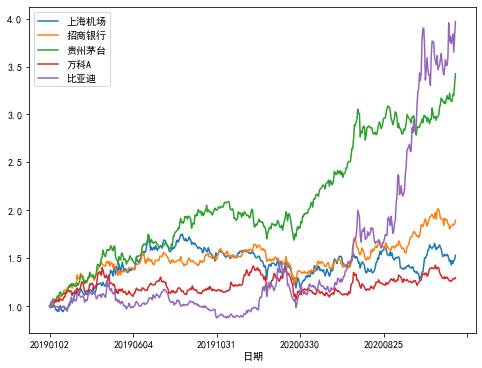

In [7]:
(data/data.iloc[0]).plot(figsize=(8, 6))

In [8]:
R = np.log(data/data.shift(1))

In [9]:
R.dropna(inplace=True)

In [10]:
R.describe()

,上海机场,招商银行,贵州茅台,万科A,比亚迪
count,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.000874,0.001314,0.002533,0.000533,0.002838
std,0.020815,0.017098,0.018691,0.018943,0.030058
min,-0.078063,-0.053487,-0.082345,-0.084568,-0.105360
25%,-0.011450,-0.008850,-0.007831,-0.010071,-0.014553
50%,-0.000570,0.000264,0.001224,-0.000733,0.002545
75%,0.012218,0.010733,0.013105,0.010287,0.016757
max,0.072245,0.095209,0.057168,0.079476,0.095310


array([[<AxesSubplot:title={'center':'上海机场'}>,
        <AxesSubplot:title={'center':'招商银行'}>],
       [<AxesSubplot:title={'center':'贵州茅台'}>,
        <AxesSubplot:title={'center':'万科A'}>],
       [<AxesSubplot:title={'center':'比亚迪'}>, <AxesSubplot:>]],
      dtype=object)

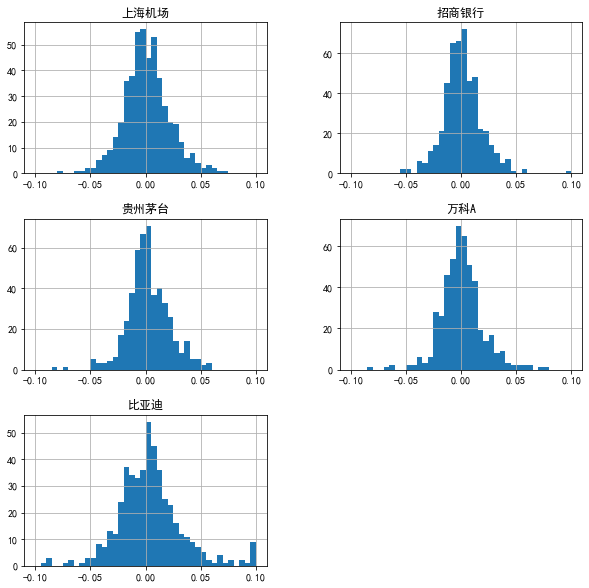

In [11]:
R.hist(bins=np.linspace(-0.1, 0.1, 41, endpoint=True), figsize=(10, 10))

In [12]:
R_mean = R.mean() * 252
print(R_mean)

上海机场    0.220226
招商银行    0.331152
贵州茅台    0.638269
万科A     0.134196
比亚迪     0.715052
dtype: float64


In [13]:
R_cov = R.cov() * 252
print(R_cov)

          上海机场      招商银行      贵州茅台       万科A       比亚迪
上海机场  0.109177  0.039231  0.046936  0.041095  0.034059
招商银行  0.039231  0.073669  0.037998  0.047372  0.030378
贵州茅台  0.046936  0.037998  0.088034  0.031465  0.042686
万科A   0.041095  0.047372  0.031465  0.090423  0.039524
比亚迪   0.034059  0.030378  0.042686  0.039524  0.227678


In [14]:
R_corr = R.corr()
print(R_corr)

          上海机场      招商银行      贵州茅台       万科A       比亚迪
上海机场  1.000000  0.437445  0.478754  0.413606  0.216027
招商银行  0.437445  1.000000  0.471840  0.580415  0.234557
贵州茅台  0.478754  0.471840  1.000000  0.352663  0.301510
万科A   0.413606  0.580415  0.352663  1.000000  0.275459
比亚迪   0.216027  0.234557  0.301510  0.275459  1.000000


In [15]:
R_vol = R.std() * np.sqrt(252)
print(R_vol)

上海机场    0.330420
招商银行    0.271421
贵州茅台    0.296705
万科A     0.300705
比亚迪     0.477157
dtype: float64


In [16]:
weights = np.array([0.10220201, 0.27353176, 0.1263887,  0.32700943, 0.1708681 ])

In [17]:
R_port = np.sum(weights * R_mean)
print("投资组合的预期收益率：{:.2%}".format(R_port))

投资组合的预期收益率：35.98%


In [18]:
vol_port = np.sqrt(np.dot(weights, np.dot(R_cov, weights.T)))
print("投资组合的收益波动率：{:.2%}".format(vol_port))

投资组合的收益波动率：23.35%


In [19]:
Rp_list = list()    # 建立一个初始的投资组合收益率数列
Vp_list = list()    # 建立一个初始的投资组合收益波动率数列
for i in np.arange(1000):
    # 生成1000个不同权重的预期收益率与收益波动率
    x = np.random.random(5)
    weights = x / sum(x)
    Rp_list.append(np.sum(weights*R_mean))
    Vp_list.append(np.sqrt(np.dot(weights, np.dot(R_cov, weights.T))))

In [20]:
Vp_list

[0.22774150262027473,
 0.23416613859463367,
 0.24321294254203257,
 0.2471216993494034,
 0.24506905064693593,
 0.3030676375496963,
 0.2575421067014706,
 0.2377498895469581,
 0.2281491608379638,
 0.2699159457162872,
 0.2479957425506728,
 0.2541243214486204,
 0.2432065986008127,
 0.2558101918094105,
 0.25545791662807643,
 0.23959218198887117,
 0.23588518418848473,
 0.27534751902376287,
 0.23621954821111038,
 0.242639531735287,
 0.26923381585735506,
 0.26575746341600337,
 0.22759707193594772,
 0.2300957165595139,
 0.2373126042699238,
 0.2521743412642848,
 0.2500563911664381,
 0.23600131200199775,
 0.23200115045384323,
 0.2514199339732724,
 0.24543727674953839,
 0.2385467884875102,
 0.23892628904702948,
 0.26748028040658867,
 0.2369473926417263,
 0.26323170957632297,
 0.2519906527439613,
 0.23752373448851677,
 0.2319980159023656,
 0.24179220487488334,
 0.24012783408099794,
 0.25134621218739717,
 0.23212303175888152,
 0.24940585675269863,
 0.23544320014695944,
 0.2401492312759338,
 0.2286777

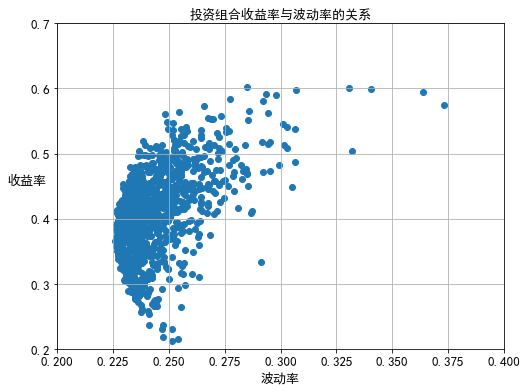

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(Vp_list, Rp_list)
plt.xlabel(u'波动率', fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(max(0, round(min(Vp_list) -0.05, 1)), round(max(Vp_list) + 0.05, 1))
plt.ylim(round(min(Rp_list) - 0.05, 1), round(max(Rp_list) + 0.05, 1))
plt.title(u'投资组合收益率与波动率的关系', fontsize=13)
plt.grid('True')
plt.show()

In [22]:
import scipy.optimize as sco

def f(w):
    # 定义一个需要求解最优化的函数
    w = np.array(w)              # 设置投资组合中每只股票的权重
    Rp_opt = np.sum(w * R_mean)  # 计算最优化投资组合的预期收益率
    Vp_opt = np.sqrt(np.dot(w, np.dot(R_cov, w.T)))     # 计算优化投资组合的收益波动率
    return np.array([Rp_opt, Vp_opt])                              # 以数组的格式输出

def Vmin_f(w):
    # 定义一个得到最小波动率的权重函数
    # 输出前面定义的函数f(w)结果的第二个元素
    return f(w)[1]

p_pct = 0.5      # 预期收益率等于50%
# 以字典格式依次输入权重的约束条件
cons = (
    {
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    },
    {
        'type': 'eq',
        'fun': lambda x: f(x)[0] - p_pct
    }
)
# 以元组格式输入权重的边界条件
bnds = tuple((0, 1) for x in range(len(R_mean)))

weights0 = len(R_mean) * [1.0 / len(R_mean), ]  # 用于生成一个权重相等的数组
result = sco.minimize(Vmin_f, weights0, method="SLSQP", bounds=bnds, constraints=cons)

for stock_item, idx in zip(R_mean.index, range(len(R_mean))):
    print("投资组合预期收益率{:.0%}时{}的权重: {:.4f}".format(p_pct, stock_item, result['x'][idx]))

投资组合预期收益率50%时上海机场的权重: 0.0420
投资组合预期收益率50%时招商银行的权重: 0.3208
投资组合预期收益率50%时贵州茅台的权重: 0.4369
投资组合预期收益率50%时万科A的权重: 0.0647
投资组合预期收益率50%时比亚迪的权重: 0.1356


In [23]:
# 仅设置权重和等于1的约束条件
cons = (
    {
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }
)

result_vmin = sco.minimize(Vmin_f, weights0, method="SLSQP", bounds=bnds, constraints=cons)
Rp_vmin = np.sum(R_mean * result_vmin['x'])
Vp_vmin = result_vmin['fun']

print("波动率在可行集是全局最小值时的投资组合预期收益率: {:.4f}".format(Rp_vmin))
print("在可行集是全局最小的波动率: {:.4f}".format(Vp_vmin))

波动率在可行集是全局最小值时的投资组合预期收益率: 0.3821
在可行集是全局最小的波动率: 0.2257


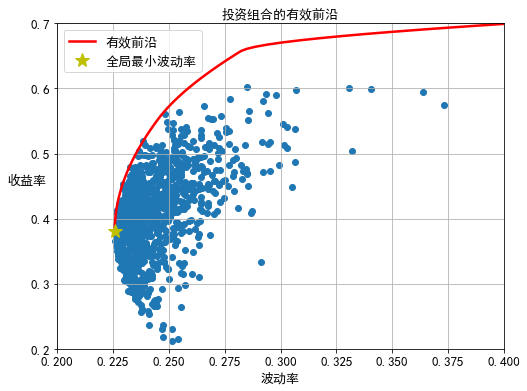

In [24]:
Rp_target = np.linspace(Rp_vmin, max(Rp_list) + 0.1, 100)   # 生成投资组合的目标收益率数组
Vp_target = list()
for r in Rp_target:
    # 以字典格式依次输入预期收益率等于目标收益率的约束条件和权重的约束条件
    cons_new = (
        {
            'type': 'eq',
            'fun': lambda x: np.sum(x) - 1
        },
        {
            'type': 'eq',
            'fun': lambda x: f(x)[0] - r
        }
    )
    result_new = sco.minimize(Vmin_f, weights0, method="SLSQP", bounds=bnds, constraints=cons_new)
    Vp_target.append(result_new['fun'])

plt.figure(figsize=(8, 6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label=u'有效前沿', lw=2.5)
plt.plot(Vp_vmin, Rp_vmin, 'y*', label=u'全局最小波动率', markersize=14)
plt.xlabel(u'波动率', fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(max(0, round(min(Vp_list) -0.05, 1)), round(max(Vp_list) + 0.05, 1))
plt.ylim(round(min(Rp_list) - 0.05, 1), round(max(Rp_list) + 0.05, 1))
plt.title(u'投资组合的有效前沿', fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()